In [2]:
from pandas import  *
from seaborn import *
from matplotlib.pyplot import *
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

In [3]:
df=read_csv('Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
x=df.iloc[: , 1:4]
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [5]:
y=(df['sales'])

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=556)

In [65]:
r=LinearRegression()
r.fit(x_train,y_train)


LinearRegression()

In [66]:

r.score(x_train,y_train)

0.8874637789403572

In [67]:
r.score(x_test,y_test)

0.9712209587469371

In [68]:
r.predict([[44,39,45]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.19051238])

In [70]:
r2=PolynomialFeatures(degree=2)# degree=9(not for low inputs) is best for this case
x2=r2.fit_transform(x)          # 2,3 is universal degree

In [71]:
l=LinearRegression()
l.fit(x2,y)
l.score(x2,y)

0.9865057435307856

In [51]:
l.predict(r2.fit_transform([[44,39,45]]))

array([10.42281939])

In [52]:
l.predict(r2.fit_transform([[214.7,24.5,4.5]]))

array([17.51145378])

In [53]:
l.predict(r2.fit_transform([[204,32.5,45.5]]))

array([19.22522858])

In [54]:
l.predict(r2.fit_transform([[9,50,76]]))  

array([8.24679132])

In [16]:
l.predict(r2.fit_transform([[200,2.9,22]])) 

array([11.69250597])

In [17]:
l.predict(r2.fit_transform([[150,41,60]])) 

array([18.46362765])

LASSO REG.

In [18]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.1)
ls.fit(x,y)

Lasso(alpha=0.1)

In [19]:
ls.coef_

array([ 0.04575172,  0.18788735, -0.00066758])

In [20]:
names=x.columns
names

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [21]:
rng=range(len(names))

Text(0, 0.5, 'LASSO coeff.')

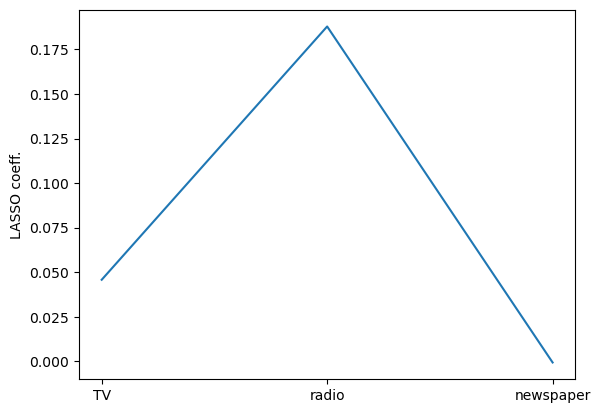

In [22]:
plot(rng,ls.coef_)
xticks(rng,names)
ylabel('LASSO coeff.')

HIGHEST INFLUENCE IS BY RADIO , then TV..

In [23]:
ls.score(x,y)

0.8972068586756202

In [24]:
ls.predict([[44,39,45]])  # wrong pred by Lasso

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([12.25508005])

In [25]:
ls.predict([[214.7,24.5,4.5]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([17.36756869])

In [26]:
ls.predict([[204,32.5,45.5]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([18.35375351])

In [27]:
ls.predict([[9,50,76]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([12.69983591])

In [28]:
ls.predict([[150,41,60]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([17.47052333])

ELASTICNET REG.         (accu. is almost as same as Lasso)

In [29]:
from sklearn.linear_model import ElasticNet
e=ElasticNet(l1_ratio=0.5)

In [30]:
e.fit(x,y)
e.score(x,y)

0.8971345697478473

In [31]:
e.predict([[44,39,45]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


array([12.22851332])

Text(0, 0.5, 'Elasticnet coeff.')

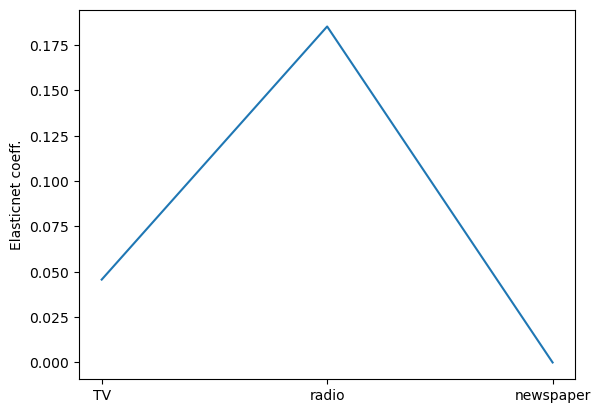

In [32]:
plot(rng,e.coef_)
xticks(rng,names)
ylabel('Elasticnet coeff.')

Degree 1: Train Score = 0.8957008271017817, Test Score = 0.8994380241009119
Degree 2: Train Score = 0.986104518792419, Test Score = 0.9869181490609598
Degree 3: Train Score = 0.9916695295589968, Test Score = 0.9906674629164688
Degree 4: Train Score = 0.9932602927696259, Test Score = 0.9318143143123369
Degree 5: Train Score = 0.9946925809447665, Test Score = -1.441874288402948
Degree 6: Train Score = 0.9959651728316335, Test Score = 0.17847933606431932
Degree 7: Train Score = 0.9981540879568406, Test Score = -500.4177118515378
Degree 8: Train Score = 0.9976622422916852, Test Score = -1050263.1749802094
Degree 9: Train Score = 0.9747044985620092, Test Score = -174835625.73848227
Degree 10: Train Score = 0.8066896904601122, Test Score = -4699850742.803795
Degree 11: Train Score = 0.9384583667541018, Test Score = -4323777987.839954
Degree 12: Train Score = 0.9814534339163506, Test Score = -432510478020.33405
Degree 13: Train Score = 0.11825478507260145, Test Score = -24230009337.434116
Deg

ValueError: x and y must be the same size

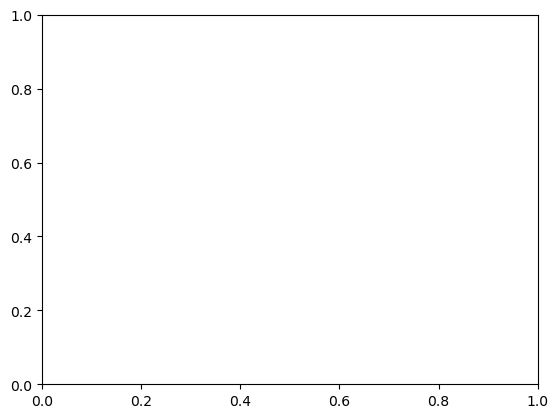

In [43]:
#FOR Polynomial Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Assuming x is your features and y is your target
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Loop through degrees from 1 to 20
degrees = np.arange(1, 21)
train_scores = []
test_scores = []

for degree in degrees:
    # Transform features to polynomial features
    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(x_train_poly, y_train)
    
    # Calculate score on training data
    train_score = model.score(x_train_poly, y_train)
    train_scores.append(train_score)
    
    # Calculate score on testing data
    test_score = model.score(x_test_poly, y_test)
    test_scores.append(test_score)

# Display scores for training and testing data
for deg, train_score, test_score in zip(degrees, train_scores, test_scores):
    print(f"Degree {deg}: Train Score = {train_score}, Test Score = {test_score}")

# Find degree with minimum difference between test and train scores
score_diff = np.abs(np.array(train_scores) - np.array(test_scores))
best_degree_min_diff = np.argmin(score_diff) + 1

print(f"\n\nDegree with minimum difference between test and train scores: {best_degree_min_diff}")

# Plotting the regression line for the degree with the highest test score
best_degree_max_test_score = np.argmax(test_scores) + 1
poly = PolynomialFeatures(degree=best_degree_max_test_score)
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

plt.scatter(x, y, color='black', label='Data')
plt.plot(x, model.predict(x_poly), color='brown', label=f'Regression Line (Degree {best_degree_max_test_score})')
plt.xlabel('x-axis')
plt.ylabel('Y-axis')
plt.title('Polynomial Regression')
plt.legend()
plt.show()


In [37]:
###
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

# Assuming 'x' and 'y' are defined with your dataset

max_train_accuracy = 0.0  # Initialize maximum training accuracy
best_train_random_state = 0  # Initialize variable to store the random state of the best training accuracy
max_test_accuracy = 0.0  # Initialize maximum testing accuracy
best_test_random_state = 0  # Initialize variable to store the random state of the best testing accuracy

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=i)
    r=LinearRegression()
    r.fit(x_train,y_train)  # Train the model
    train_score = r.score(x_train, y_train)  # Calculate accuracy on the training set
    test_score = r.score(x_test, y_test)  # Calculate accuracy on the test set
    
    # Check for the maximum training accuracy
    if train_score > max_train_accuracy:
        max_train_accuracy = train_score
        best_train_random_state = i

    # Check for the maximum testing accuracy
    if test_score > max_test_accuracy:
        max_test_accuracy = test_score
        best_test_random_state = i

print(f"The maximum training accuracy within the range of random states is: {max_train_accuracy} achieved with random state: {best_train_random_state}")
print(f"The maximum testing accuracy within the range of random states is: {max_test_accuracy} achieved with random state: {best_test_random_state}")


The maximum training accuracy within the range of random states is: 0.919371659296232 achieved with random state: 119
The maximum testing accuracy within the range of random states is: 0.9712209587469371 achieved with random state: 556


LR <= Elastinet

In [58]:
###
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Assuming 'x' and 'y' are defined with your dataset

max_train_accuracy = 0.0  # Initialize maximum training accuracy
best_train_random_state = 0  # Initialize variable to store the random state of the best training accuracy
max_test_accuracy = 0.0  # Initialize maximum testing accuracy
best_test_random_state = 0  # Initialize variable to store the random state of the best testing accuracy

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=i)
    r=ElasticNet(l1_ratio=0.5)
    r.fit(x_train,y_train)  # Train the model
    train_score = r.score(x_train, y_train)  # Calculate accuracy on the training set
    test_score = r.score(x_test, y_test)  # Calculate accuracy on the test set
    
    # Check for the maximum training accuracy
    if train_score > max_train_accuracy:
        max_train_accuracy = train_score
        best_train_random_state = i

    # Check for the maximum testing accuracy
    if test_score > max_test_accuracy:
        max_test_accuracy = test_score
        best_test_random_state = i

print(f"The maximum training accuracy within the range of random states is: {max_train_accuracy} achieved with random state: {best_train_random_state}")
print(f"The maximum testing accuracy within the range of random states is: {max_test_accuracy} achieved with random state: {best_test_random_state}")


The maximum training accuracy within the range of random states is: 0.9192590250286743 achieved with random state: 119
The maximum testing accuracy within the range of random states is: 0.9712748826296543 achieved with random state: 556
